In [ ]:
# Main portion and visualizations

In [24]:
!pip install kagglehub

In [61]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

path = kagglehub.dataset_download("rohiteng/spotify-music-analytics-dataset-20152025")
print("Path:", path)

files = os.listdir(path)
print("Files in dataset:", files)

csv_file = [f for f in files if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv_file))

df.head()

Path: C:\Users\Addaw\.cache\kagglehub\datasets\rohiteng\spotify-music-analytics-dataset-20152025\versions\1
Files in dataset: ['spotify_2015_2025_85k.csv']


,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


In [31]:
if "streams" in df.columns:
    genre_listens = df.groupby("genre")["streams"].sum()
    metric_label = "Total Streams"
else:
    genre_listens = df["genre"].value_counts()
    metric_label = "Number of Tracks"

genre_listens = genre_listens.dropna()

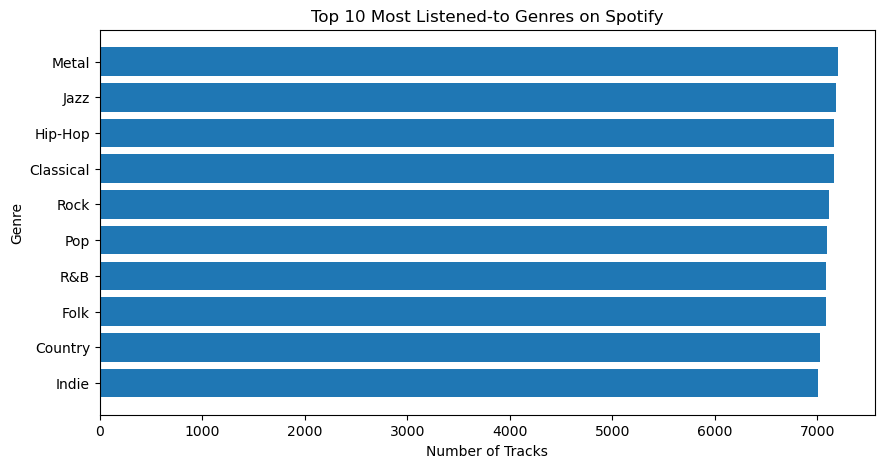

In [32]:
top_10 = genre_listens.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(top_10.index, top_10.values)
plt.title("Top 10 Most Listened-to Genres on Spotify")
plt.xlabel(metric_label)
plt.ylabel("Genre")
plt.gca().invert_yaxis()
plt.show()

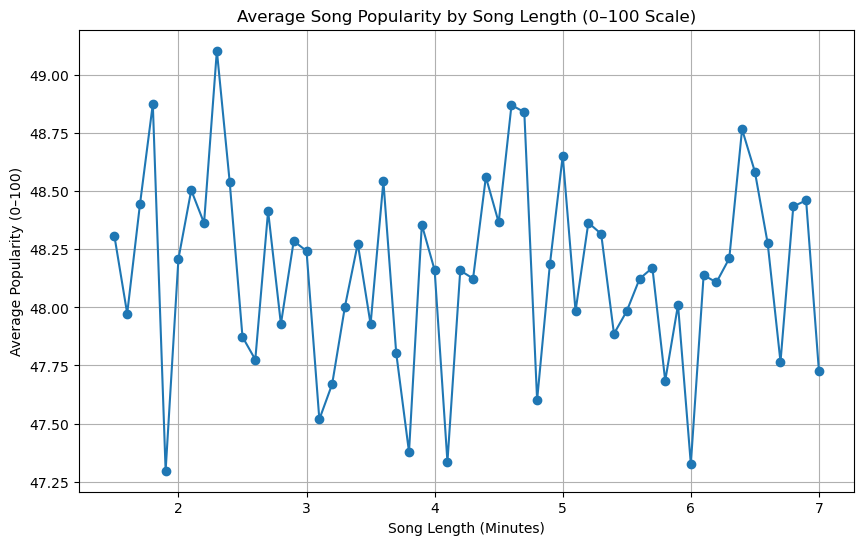

<Figure size 640x480 with 0 Axes>

In [63]:
df = df.dropna(subset=["duration_ms", "popularity"])
df["duration_min"] = df["duration_ms"] / 60000
df = df[(df["duration_min"] > 0.5) & (df["duration_min"] < 10)]
df["length_bin"] = df["duration_min"].round(1)

length_popularity = (
    df.groupby("length_bin")["popularity"]
    .mean()
    .reset_index()
    .sort_values("length_bin")
)

plt.figure(figsize=(10,6))
plt.plot(
    length_popularity["length_bin"],
    length_popularity["popularity"],
    marker="o"
)

plt.xlabel("Song Length (Minutes)")
plt.ylabel("Average Popularity (0–100)")
plt.title("Average Song Popularity by Song Length (0–100 Scale)")
plt.grid(True)
plt.show()

plt.savefig("SongLengthPopularity.png", bbox_inches="tight")

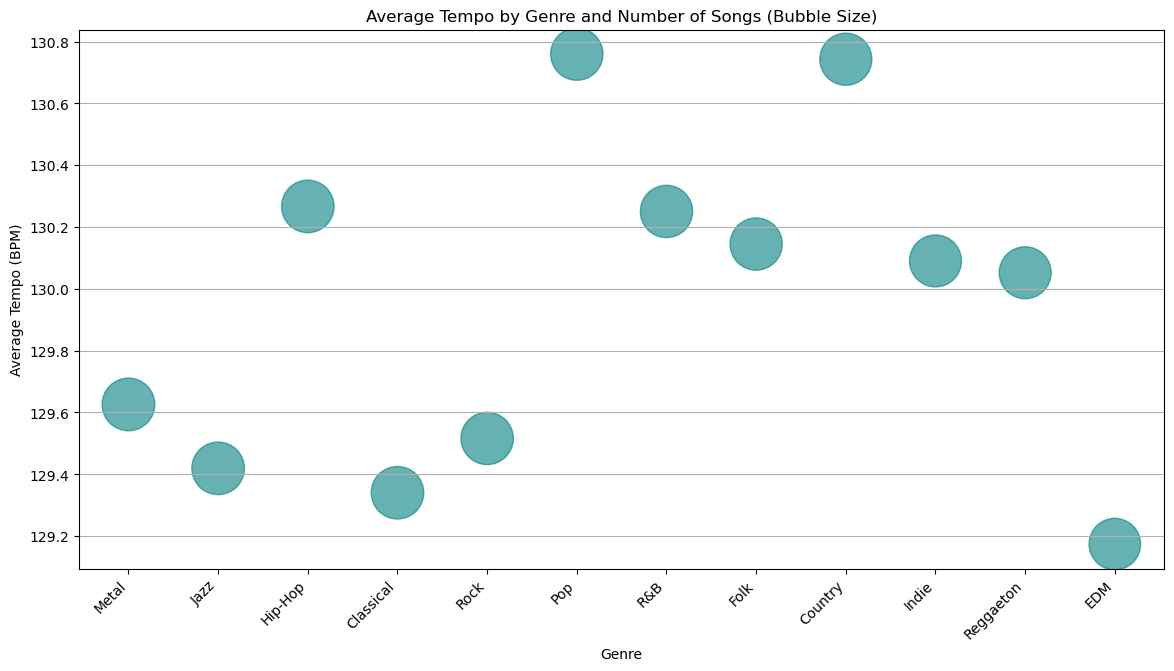

In [73]:
df = df.dropna(subset=["genre", "tempo"])

genre_stats = df.groupby("genre").agg(
    avg_tempo=("tempo", "mean"),
    song_count=("tempo", "count")
).reset_index()

top_genres = genre_stats.sort_values("song_count", ascending=False).head(15)

plt.figure(figsize=(14,7))
plt.scatter(
    x=top_genres["genre"],
    y=top_genres["avg_tempo"],
    s=top_genres["song_count"]/5,
    alpha=0.6,
    color="teal"
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Tempo (BPM)")
plt.xlabel("Genre")
plt.title("Average Tempo by Genre and Number of Songs (Bubble Size)")
plt.grid(axis="y")
plt.show()


In [ ]:
# Below are random unorganized and unimportant code lines

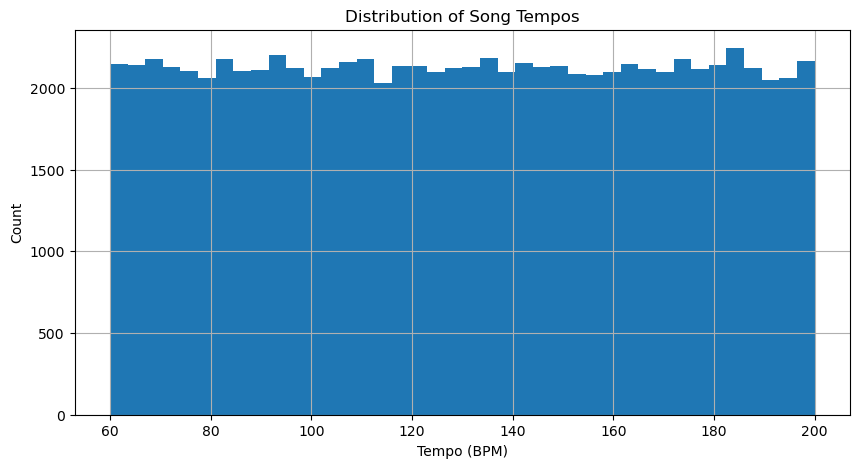

In [28]:
plt.figure(figsize=(10,5))
plt.hist(df["tempo"].dropna(), bins=40)
plt.title("Distribution of Song Tempos")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


C:\Users\Addaw\AppData\Local\Temp\ipykernel_56844\761538930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["explicit_numeric"] = df_top["explicit"].apply(lambda x: 1 if x else 0)
C:\Users\Addaw\AppData\Local\Temp\ipykernel_56844\761538930.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="genre", y="explicit_numeric", data=df_top, jitter=True, alpha=0.5, palette="tab10")


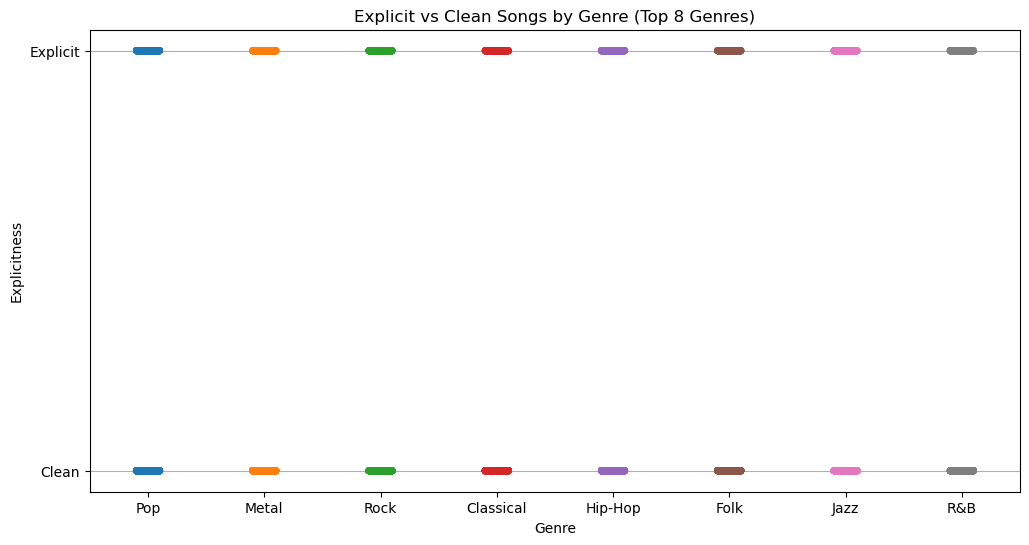

In [71]:
df = df.dropna(subset=["genre", "explicit", "popularity"])

top_genres = df["genre"].value_counts().head(8).index
df_top = df[df["genre"].isin(top_genres)]
df_top["explicit_numeric"] = df_top["explicit"].apply(lambda x: 1 if x else 0)

plt.figure(figsize=(12,6))
sns.stripplot(x="genre", y="explicit_numeric", data=df_top, jitter=True, alpha=0.5, palette="tab10")
plt.yticks([0,1], ["Clean","Explicit"])
plt.xlabel("Genre")
plt.ylabel("Explicitness")
plt.title("Explicit vs Clean Songs by Genre (Top 8 Genres)")
plt.grid(axis="y")
plt.show()


C:\Users\Addaw\AppData\Local\Temp\ipykernel_56844\1862329649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="genre", y="danceability", data=df_top, jitter=True, alpha=0.5, palette="tab10")


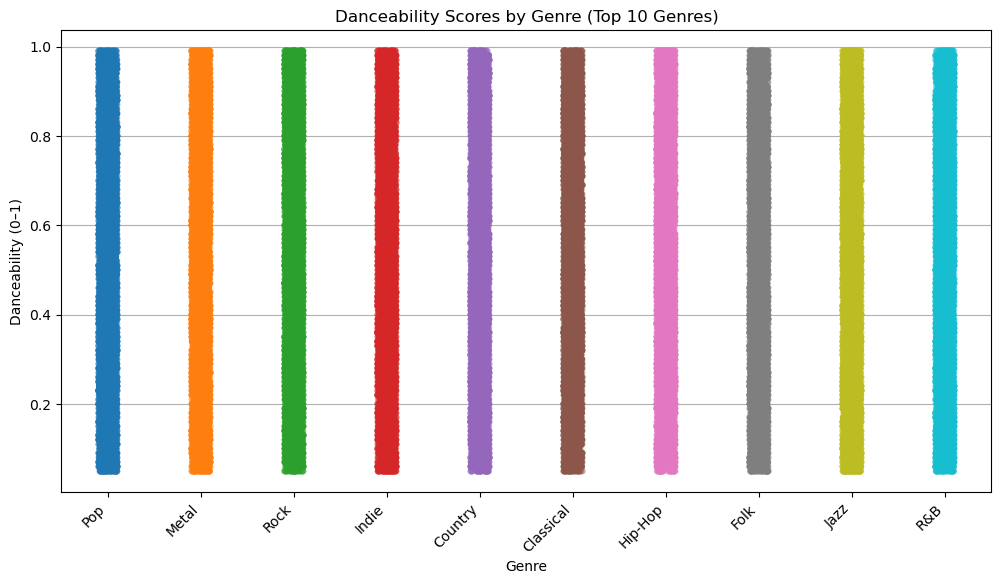

In [68]:
df = df.dropna(subset=["genre", "danceability"])
top_genres = df["genre"].value_counts().head(10).index
df_top = df[df["genre"].isin(top_genres)]

plt.figure(figsize=(12,6))
sns.stripplot(x="genre", y="danceability", data=df_top, jitter=True, alpha=0.5, palette="tab10")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Danceability (0–1)")
plt.xlabel("Genre")
plt.title("Danceability Scores by Genre (Top 10 Genres)")
plt.grid(axis="y")
plt.show()

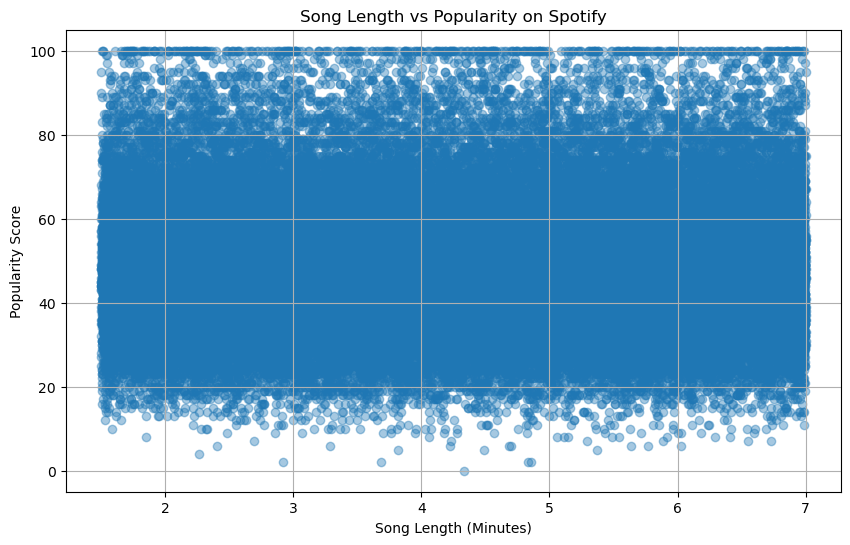

In [53]:
df = df.dropna(subset=["duration_ms", "popularity"])
df["duration_min"] = df["duration_ms"] / 60000

#Scatter
plt.figure(figsize=(10,6))
plt.scatter(df["duration_min"], df["popularity"], alpha=0.4)
plt.xlabel("Song Length (Minutes)")
plt.ylabel("Popularity Score")
plt.title("Song Length vs Popularity on Spotify")
plt.grid(True)
plt.show()

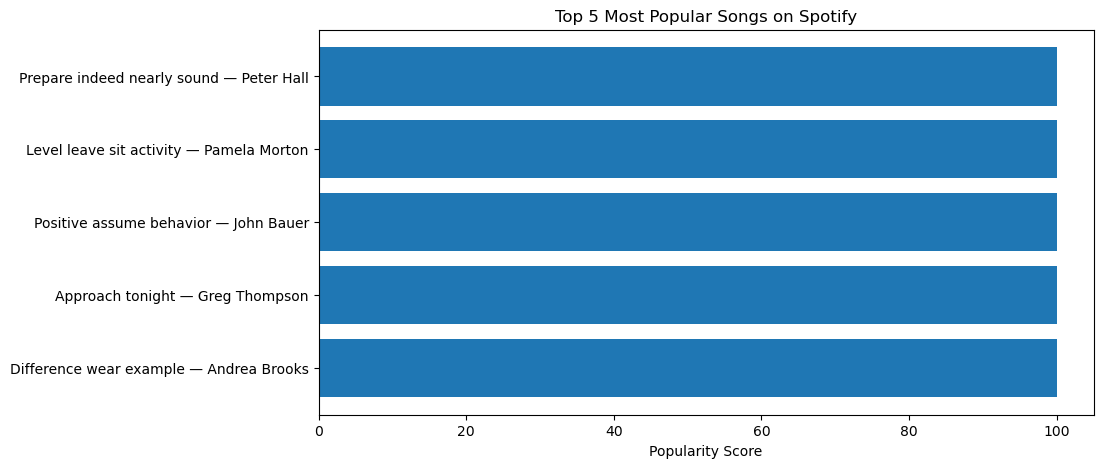

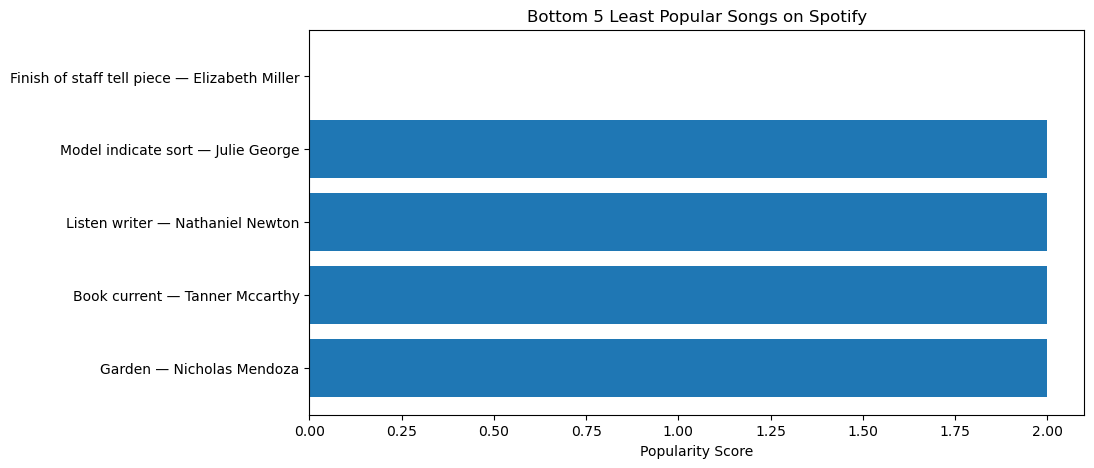

In [52]:
df = df.dropna(subset=["track_name", "artist_name", "popularity"])

df["song"] = df["track_name"] + " — " + df["artist_name"]
# Top 5 Most Popular Songs
top_5 = df.sort_values("popularity", ascending=False).head(5)

plt.figure(figsize=(10,5))
plt.barh(top_5["song"], top_5["popularity"])
plt.xlabel("Popularity Score")
plt.title("Top 5 Most Popular Songs on Spotify")
plt.gca().invert_yaxis()
plt.show()
# Bottom 5 Least Popular Songs
bottom_5 = df.sort_values("popularity", ascending=True).head(5)

plt.figure(figsize=(10,5))
plt.barh(bottom_5["song"], bottom_5["popularity"])
plt.xlabel("Popularity Score")
plt.title("Bottom 5 Least Popular Songs on Spotify")
plt.gca().invert_yaxis()
plt.show()

In [37]:
if "streams" in df.columns:
    metric = "streams"
else:
    # count
    df["streams"] = 1
    metric = "streams"


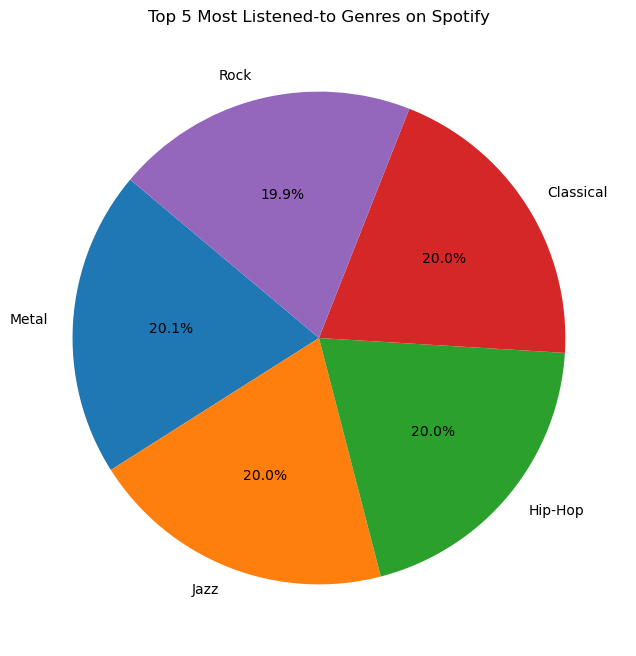

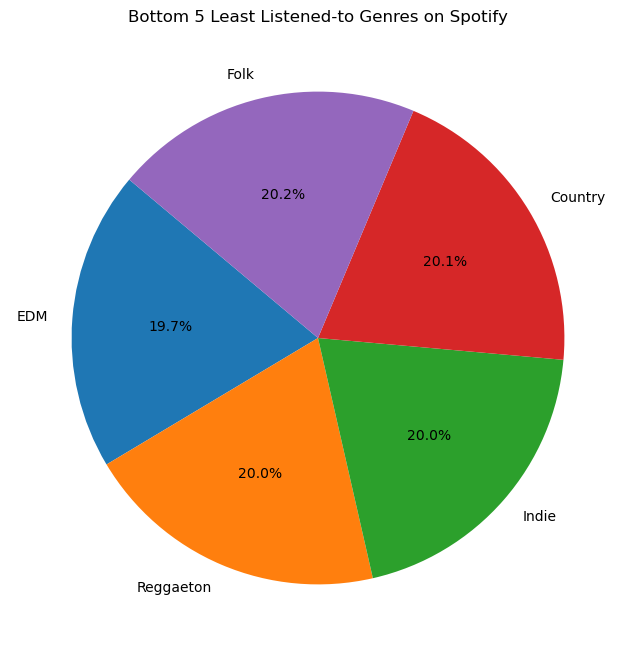

In [48]:
if "streams" in df.columns:
    metric = "streams"
    metric_label = "Total Streams"
else:
    df["streams"] = 1
    metric = "streams"
    metric_label = "Number of Tracks"

df = df.dropna(subset=["genre"])

genre_totals = df.groupby("genre")[metric].sum()

top_5 = genre_totals.sort_values(ascending=False).head(5)
bottom_5 = genre_totals.sort_values(ascending=True).head(5)

plt.figure(figsize=(8,8))
plt.pie(
    top_5.values,
    labels=top_5.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Top 5 Most Listened-to Genres on Spotify")
plt.show()

plt.figure(figsize=(8,8))
plt.pie(
    bottom_5.values,
    labels=bottom_5.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Bottom 5 Least Listened-to Genres on Spotify")
plt.show()

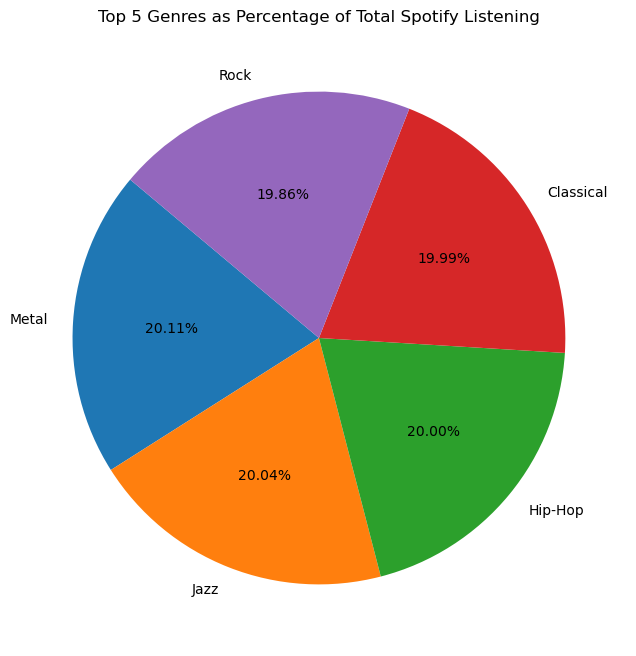

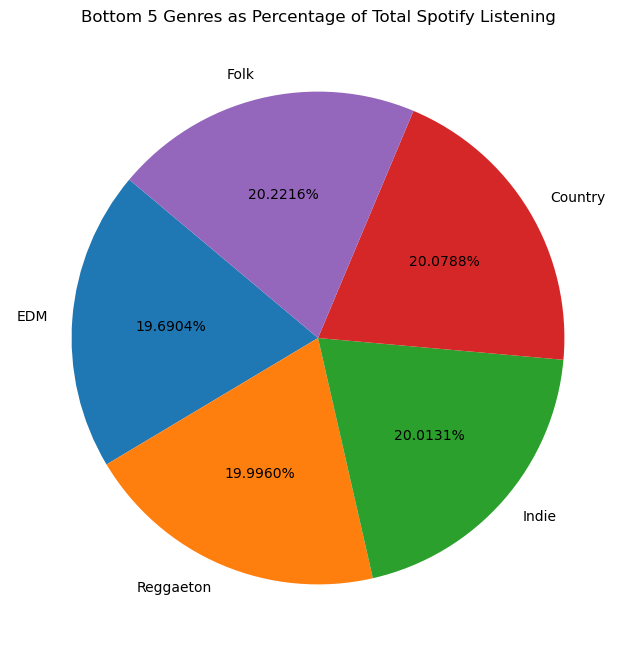

In [49]:
if "streams" in df.columns:
    metric = "streams"
    metric_label = "Total Streams"
else:
    df["streams"] = 1
    metric = "streams"
    metric_label = "Track Count (Proxy for Listening)"

df = df.dropna(subset=["genre"])

genre_totals = df.groupby("genre")[metric].sum()

total_listening = genre_totals.sum()

top_5 = genre_totals.sort_values(ascending=False).head(5)
bottom_5 = genre_totals.sort_values(ascending=True).head(5)

top_5_pct = (top_5 / total_listening) * 100
bottom_5_pct = (bottom_5 / total_listening) * 100

plt.figure(figsize=(8,8))
plt.pie(
    top_5_pct.values,
    labels=top_5_pct.index,
    autopct="%1.2f%%",
    startangle=140
)
plt.title("Top 5 Genres as Percentage of Total Spotify Listener")
plt.show()

plt.figure(figsize=(8,8))
plt.pie(
    bottom_5_pct.values,
    labels=bottom_5_pct.index,
    autopct="%1.4f%%",
    startangle=140
)
plt.title("Bottom 5 Genres as Percentage of Total Spotify Listeners")
plt.show()

In [27]:
plt.figure(figsize=(10,5))
yearly_popularity = df.groupby("year")["popularity"].mean()

plt.plot(yearly_popularity.index, yearly_popularity.values)
plt.title("Average Song Popularity Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid(True)
plt.show()

KeyError: 'year'

<Figure size 1000x500 with 0 Axes>

In [46]:
yearly = df.groupby(["year", "genre"])[metric].sum().reset_index()

plt.figure(figsize=(10,6))

for genre in top_5_genres:
    genre_data = yearly[yearly["genre"] == genre]
    plt.plot(genre_data["year"], genre_data[metric], label=genre)

plt.title("Top 5 Most Listened-to Genres Over Time")
plt.xlabel("Year")
plt.show()


KeyError: 'year'

In [13]:
path = kagglehub.dataset_download("rohiteng/spotify-music-analytics-dataset-20152025")
print("Path:", path)

NameError: name 'kagglehub' is not defined

import mlcroissant as mlc
import pandas as pd

dataset = mlc.Dataset('https://www.kaggle.com/datasets/rohiteng/spotify-music-analytics-dataset-20152025/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
record_set_df.head()

In [26]:
import pandas as pd
import numpy as np
housing = pd.read_csv("sample_data/california_housing_test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'sample_data/california_housing_test.csv'

In [4]:
housing.loc[(housing.total_rooms > 5000) & (housing.median_income > 10)

_IncompleteInputError: incomplete input (2870343534.py, line 1)

In [ ]:
housing['median_income_per_household'] = housing['median_income'] / housing['households']
housing.columns